In [1]:
import numpy as np
import scipy.linalg as la
import scipy.optimize as opt
import time
import matplotlib.pyplot as plt

**Exercise 1**

In [2]:
def newton_q1(Df, D2f, x0, maxiter=400, tol=1e-6):
    x = x0
    diff = 1e3
    k = 0
    
    while diff > tol and k < maxiter:
        Df_tilde = Df(x)
        z = la.solve(D2f(x), Df_tilde.T)
        x_tilde = x - z
        diff = la.norm(Df_tilde, np.inf)
        x = x_tilde
        k += 1
    
    return x, k < maxiter, k

In [3]:
newton_q1(opt.rosen_der, opt.rosen_hess, [-2, 2])

(array([1., 1.]), True, 6)

In [4]:
f = opt.rosen
df = opt.rosen_der
d2f = opt.rosen_hess
opt.fmin_bfgs(f=f, x0=[-2,2], fprime=df, maxiter=50)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 42
         Gradient evaluations: 42


array([1.00000021, 1.00000045])

**Exercise 2**

In [5]:
def bfgs_q2(Df, x0, maxiter=400, tol=1e-6):

    diff = 1e3 # The usual cirteria is not a good choice for BFGS - consider changing this
    x = x0
    k = 0
    df = Df(x)
    A0_inv = np.eye(len(x0))
    
    while diff > tol and k < maxiter:
        x_tilde = x - A0_inv @ df.T # (12.6)
        s = x_tilde - x
        df_tilde = Df(x_tilde)
        y = df_tilde - df
        
        if (s @ y) ** 2 == 0:
            return False
        
        # (12.7)
        Ainv_tilde = A0_inv + (s @ y + y @ A0_inv @ y) * np.outer(s, s) / \
        (s @ y)**2 - (A0_inv @ np.outer(y, s) + np.outer(s, y) @ A0_inv) / (s @ y)
    
        diff = la.norm(df_tilde, np.inf)
        k += 1
        
        x = x_tilde
        df = df_tilde
        A0_inv = Ainv_tilde
        
    return x, k < maxiter, k

In [6]:
bfgs_q2(opt.rosen_der, [-2, 2])

(array([1.0000001 , 1.00000019]), True, 145)

**Exercise 3**

In [7]:
def plot_q3(N):
    
    newton_it = np.empty(N)
    newton_time = np.empty(N)
    bfgs_it = np.empty(N)
    bfgs_time = np.empty(N)
    scipy_it = np.empty(N)
    scipy_time = np.empty(N)
    
    
    
    for n in range(N):
        x0 = np.random.uniform(-3, 3, size=2)
        
        newton_begin = time.time()
        newton_it[n] = newton_q1(opt.rosen_der, opt.rosen_hess, x0)[-1]
        newton_end = time.time() - newton_begin
        newton_time[n] = newton_end
        
        bfgs_begin = time.time()
        bfgs_it[n] = bfgs_q2(opt.rosen_der, x0)[-1]
        bfgs_end = time.time() - bfgs_begin
        bfgs_time[n] = bfgs_end
        
        scipy_begin = time.time()
        scipy_it[n] = len(opt.fmin_bfgs(opt.rosen, x0, opt.rosen_der, 
                                        disp=False, retall=True)[-1])
        scipy_end = time.time() - scipy_begin
        scipy_time[n] = scipy_end
    
    plt.figure(figsize=(8, 4))
    plt.scatter(newton_time, newton_it, alpha=0.4, label='Newton\'s Method')
    plt.scatter(bfgs_time, bfgs_it, alpha=0.4, label='BFGS')
    plt.scatter(scipy_time, scipy_it, alpha=0.4, label='scipy.optimize.fmin_bfgs()')
    plt.loglog()
    plt.xlabel('Time (seconds)')
    plt.ylabel('Iterations')
    plt.legend()
    plt.show()

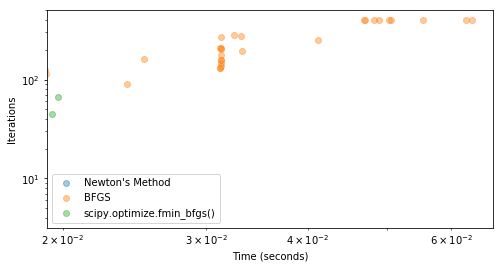

In [8]:
plot_q3(100)

In [9]:
# ^ WHY IS THIS BEING WEIRD?!?!?!?!?!?!?

**Exercise 4**

In [10]:
def gaussnewt_q4(ϕ, Dϕ, r, J, x0, maxiter=400, tol=1e-6):
    x = x0
    diff = 1e3
    k = 0
    
    while diff > tol and k < maxiter:
        Dϕ_tilde = Dϕ(x)
        D2ϕ = J.T * J # 'function' object has no attribute 'T'
        z = la.solve(D2ϕ, Df_tilde.T)
        x_tilde = x - z
        diff = la.norm(Dϕ_tilde, np.inf)
        x = x_tilde
        k += 1

    
    return x, k, k < maxiter

In [11]:
T = np.arange(10)
y = 3*np.sin(0.5*T) + 0.5*np.random.rand(10)

model = lambda x, t: x[0]*np.sin(x[1]*t)
residual = lambda x: model(x, T) - y
jac = lambda x: np.column_stack((np.sin(x[1]*t), x[0]*t*np.cos(x[1]*t)))
Df = lambda x: jac(x).T * residual(x)

In [12]:
x = [2.5, 0.6]
t = 1
print(residual(x))
print(jac(x))

[-0.00679857 -0.07889057 -0.59349876 -0.80489647 -1.09284845 -1.74139772
 -2.02048845 -1.15907095 -0.42304575  0.59985228]
[[0.56464247 2.06333904]]


In [13]:
gaussnewt_q4(model, Df, residual, jac, [2.5, 0.6])

AttributeError: 'function' object has no attribute 'T'